# Visualisation of Road Traffic Deaths of Different Countries in 2013

There are 3 Different Datasets being used in this task:
1. Road Traffic Death by the type of User
2. Estimated Road Traffic Death rate per 100000 population
3. Geographical locations of Continents and Countries

Phase 1: Cleaning of First Two Datasets and merging

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading 1st Dataset:Road Traffic Death by type of user Dataset

dataByTypeOfUser = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\complete.csv", encoding="ISO-8859-1")

In [3]:
# Reading 2nd Dataset:Road Traffic Death rate (per 100000 population)

dataOfDeathRate = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death\completedata.csv", encoding="ISO-8859-1")

In [4]:
dataByTypeOfUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
Unnamed: 0                                                        143 non-null object
Unnamed: 1                                                        143 non-null object
Distribution of road traffic deaths by type of road user (%)      143 non-null object
Distribution of road traffic deaths by type of road user (%).1    143 non-null object
Distribution of road traffic deaths by type of road user (%).2    143 non-null object
Distribution of road traffic deaths by type of road user (%).3    143 non-null object
Distribution of road traffic deaths by type of road user (%).4    143 non-null object
dtypes: object(7)
memory usage: 7.9+ KB


In [5]:
dataOfDeathRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
Unnamed: 0                                                    191 non-null object
Estimated number of road traffic deaths                       180 non-null object
Estimated road traffic death rate (per 100 000 population)    191 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [6]:
dataByTypeOfUser.head()

,Unnamed: 0,Unnamed: 1,Distribution of road traffic deaths by type of road user (%),Distribution of road traffic deaths by type of road user (%).1,Distribution of road traffic deaths by type of road user (%).2,Distribution of road traffic deaths by type of road user (%).3,Distribution of road traffic deaths by type of road user (%).4
0,Country,Year,Drivers/passengers of 4-wheeled vehicles,Drivers/passengers of motorized 2- or 3-wheelers,Cyclists,Pedestrians,Other/unspecified road users
1,Albania,2013,50.8,13.2,4.1,31.2,0.7
2,Andorra,2013,0.0,50.0,0.0,50.0,0.0
3,Angola,2013,0.0,1.9,0.0,35.4,62.7
4,Antigua and Barbuda,2013,66.7,0.0,16.7,16.7,0.0


In [7]:
dataOfDeathRate.head()

,Unnamed: 0,Estimated number of road traffic deaths,Estimated road traffic death rate (per 100 000 population)
0,Country,2013,2013.0
1,Afghanistan,4 734 [4 006 - 5 461],15.5
2,Albania,478 [435 - 521],15.1
3,Algeria,9 337 [7 985 - 10 689],23.8
4,Andorra,6,7.6


In [8]:
#Dispaly the number of rows and columns
dataByTypeOfUser.shape

(143, 7)

In [9]:
##Dispaly the number of rows and columns
dataOfDeathRate.shape

(191, 3)

In [10]:
#dataByTypeOfUser.rename(columns=dataByTypeOfUser.iloc[0]).drop(dataByTypeOfUser.index[0], inplace = True)

In [11]:
#Deleting 1st Row of dataByTypeOfUser dataset since it is not necessary in the future operations

with open(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\complete.csv",'r') as f, open(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\completev1.csv",'w') as f1:
    next(f) # skip header line
    for line in f:
        f1.write(line)

In [12]:
dataByTypeOfUserV1 = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\completev1.csv", encoding="ISO-8859-1")

In [13]:
dataByTypeOfUserV1.head()

,Country,Year,Drivers/passengers of 4-wheeled vehicles,Drivers/passengers of motorized 2- or 3-wheelers,Cyclists,Pedestrians,Other/unspecified road users
0,Albania,2013,50.8,13.2,4.1,31.2,0.7
1,Andorra,2013,0.0,50.0,0.0,50.0,0.0
2,Angola,2013,0.0,1.9,0.0,35.4,62.7
3,Antigua and Barbuda,2013,66.7,0.0,16.7,16.7,0.0
4,Argentina,2013,88.0,0.0,2.0,10.1,0.0


Below lines of code modifies the version 1 of the dataset dataByTypeOfUserV1
1. Delete the column "Year" since it is common 2013
2. Renaming the column names as per the convinence 

In [14]:
#deleting the year column
dataByTypeOfUserV1.drop('Year', axis = 1, inplace = True)

In [15]:
#renaming Column names
dataByTypeOfUserV1.rename(columns = ({' Drivers/passengers of 4-wheeled vehicles':'Four-Wheelers',' Drivers/passengers of motorized 2- or 3-wheelers':'Two-Wheelers',' Other/unspecified road users':'Others'}), inplace=True)

In [16]:
dataByTypeOfUserV1.head()

,Country,Four-Wheelers,Two-Wheelers,Cyclists,Pedestrians,Others
0,Albania,50.8,13.2,4.1,31.2,0.7
1,Andorra,0.0,50.0,0.0,50.0,0.0
2,Angola,0.0,1.9,0.0,35.4,62.7
3,Antigua and Barbuda,66.7,0.0,16.7,16.7,0.0
4,Argentina,88.0,0.0,2.0,10.1,0.0


In [61]:
dataByTypeOfUserV1.to_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\completeV2.csv",index = False)

In [17]:
dataByTypeOfUserV2 = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death by type of road user\completeV2.csv",encoding="ISO-8859-1")

In [18]:
dataByTypeOfUserV2.head()

,Country,Four-Wheelers,Two-Wheelers,Cyclists,Pedestrians,Others
0,Albania,50.8,13.2,4.1,31.2,0.7
1,Andorra,0.0,50.0,0.0,50.0,0.0
2,Angola,0.0,1.9,0.0,35.4,62.7
3,Antigua and Barbuda,66.7,0.0,16.7,16.7,0.0
4,Argentina,88.0,0.0,2.0,10.1,0.0


Below lines of code modifies the version 2 of the dataset dataOfDeathRateV1
1. Modification of current dataset to new dataset which contains only Country and Estimated road traffic death rate (per 100 000 population)

In [19]:
dataOfDeathRate.head()

,Unnamed: 0,Estimated number of road traffic deaths,Estimated road traffic death rate (per 100 000 population)
0,Country,2013,2013.0
1,Afghanistan,4 734 [4 006 - 5 461],15.5
2,Albania,478 [435 - 521],15.1
3,Algeria,9 337 [7 985 - 10 689],23.8
4,Andorra,6,7.6


In [20]:
#dataOfDeathRate.rename(columns=dataOfDeathRate.iloc[0]).drop(dataOfDeathRate.index[0], inplace = True)

In [21]:
dataOfDeathRate.drop('Estimated number of road traffic deaths', axis = 1, inplace = True)

In [22]:
dataOfDeathRate.head()

,Unnamed: 0,Estimated road traffic death rate (per 100 000 population)
0,Country,2013.0
1,Afghanistan,15.5
2,Albania,15.1
3,Algeria,23.8
4,Andorra,7.6


In [23]:
dataOfDeathRate.drop(dataOfDeathRate.index[[0]], inplace = True)

In [24]:
dataOfDeathRate.rename(columns = {'Unnamed: 0':'Country'}, inplace=True)

In [25]:
dataOfDeathRate.head()

,Country,Estimated road traffic death rate (per 100 000 population)
1,Afghanistan,15.5
2,Albania,15.1
3,Algeria,23.8
4,Andorra,7.6
5,Angola,26.9


In [107]:
dataOfDeathRate.to_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death\completedataV2.csv", index = False)

In [26]:
dataOfDeathRateV2 = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\road traffic death\completedataV2.csv",encoding="ISO-8859-1")

In [27]:
dataOfDeathRateV2.head()

,Country,Estimated road traffic death rate (per 100 000 population)
0,Afghanistan,15.5
1,Albania,15.1
2,Algeria,23.8
3,Andorra,7.6
4,Angola,26.9


Below lines of code replaces Countries with No Data available to 0

In [28]:
dataByTypeOfUserV2.replace('No data',0,inplace=True)

In [29]:
dataOfDeathRateV2.replace('No data',0,inplace=True)

In [30]:
dataByTypeOfUserV2.head()

,Country,Four-Wheelers,Two-Wheelers,Cyclists,Pedestrians,Others
0,Albania,50.8,13.2,4.1,31.2,0.7
1,Andorra,0.0,50.0,0.0,50.0,0.0
2,Angola,0.0,1.9,0.0,35.4,62.7
3,Antigua and Barbuda,66.7,0.0,16.7,16.7,0.0
4,Argentina,88.0,0.0,2.0,10.1,0.0


In [31]:
dataOfDeathRateV2.head()

,Country,Estimated road traffic death rate (per 100 000 population)
0,Afghanistan,15.5
1,Albania,15.1
2,Algeria,23.8
3,Andorra,7.6
4,Angola,26.9


Combining Two Datasets and replacing NULL values with Zero

In [32]:
#Joining Two Datasets using Left Join
mergedV1 = dataOfDeathRateV2.merge(dataByTypeOfUserV2,on='Country',how='left')

In [33]:
mergedV1.shape

(190, 7)

In [34]:
#Replacing Null Values with 0
mergedV2 = mergedV1.fillna(0)

In [35]:
mergedV2.shape

(190, 7)

Now, we have merged two Datasets, I am going to save this new merged dataset into a seperate CSV file

In [185]:
mergedV2.to_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\converted\mergedRoadTrafficDeathV1.csv")

In [36]:
mergedRoadTrafficDeathV1 = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\converted\mergedRoadTrafficDeathV1.csv",encoding="ISO-8859-1")

In [37]:
#Checking if there are any Null Values
mergedRoadTrafficDeathV1.isnull().sum()

Country                                                       0
Estimated road traffic death rate (per 100 000 population)    0
Four-Wheelers                                                 0
Two-Wheelers                                                  0
Cyclists                                                      0
Pedestrians                                                   0
Others                                                        0
dtype: int64

Now we have cleand the data, let's perform some basic analysis which will answer the below questions:

1. Top 10 Countries of Four Wheelers road traffic death  
2. Top 10 Countries of Two Wheelers road traffic death
3. Top 10 Countries of Cyclists road traffic death
4. Top 10 Countries of Pedestrians road traffic death
5. Top 10 Countries of Others road traffic death


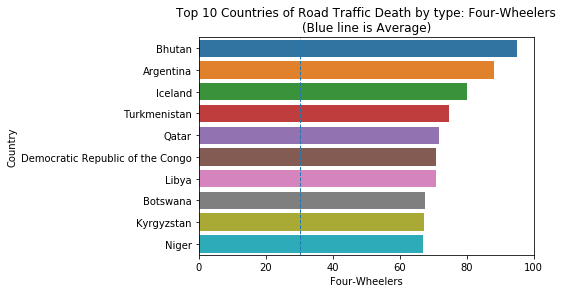

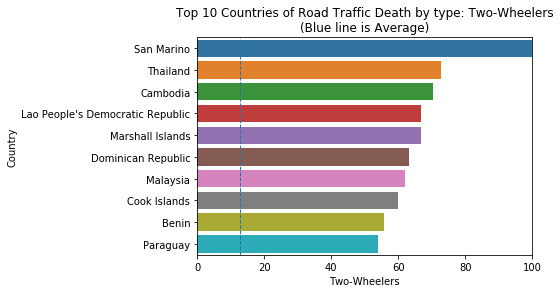

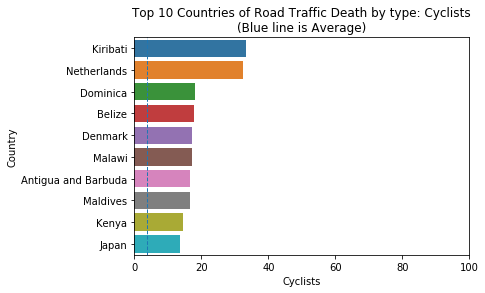

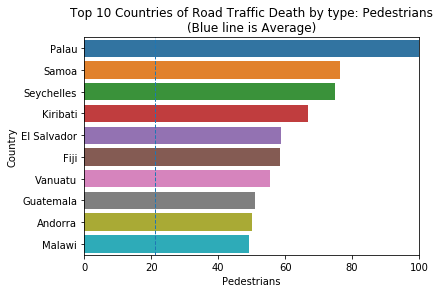

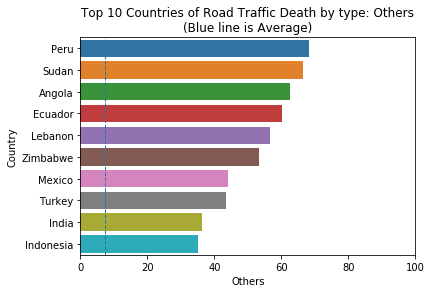

In [39]:
# Looping all the columns of the combined dataset starting from 3rd Column that is Four Wheelers
for i in mergedRoadTrafficDeathV1.columns[2:]:
    death = i
# Sorting by the type of User ( Four,Two wheelers...,) 
    sorted_data = mergedRoadTrafficDeathV1.sort_values(by=death,ascending=False)
# Maximum value of any User will be 100% so plotting x as 100 
    plt.xlim(0,100)
# Now, plot the bar 
    bp = sns.barplot(data = sorted_data.head(n=10), orient = 'h',x=death, y='Country')
    plt.axvline(mergedRoadTrafficDeathV1[death].mean(),linestyle ='dashed', linewidth =1)
    bp.set_title("Top 10 Countries of Road Traffic Death by type: "+ death +"\n(Blue line is Average)")
    plt.show()

Top 10 Countries of road traffic death rate (per 100 000 population) Graph shown below:

In [40]:
#sorting the Data
sorted_data1 = mergedRoadTrafficDeathV1.sort_values(by=["Estimated road traffic death rate (per 100 000 population)"],ascending=False)

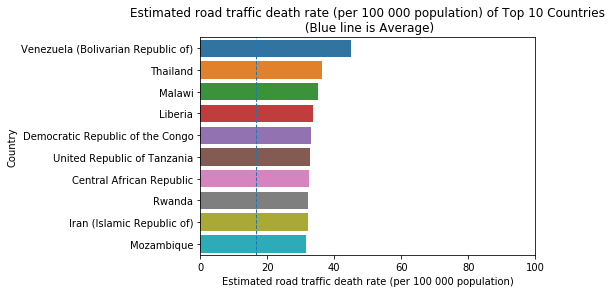

In [41]:
plt.xlim(0,100)
bp1 = sns.barplot(data = sorted_data1.head(n=10),orient = 'h',x="Estimated road traffic death rate (per 100 000 population)", y='Country')
plt.axvline(mergedRoadTrafficDeathV1["Estimated road traffic death rate (per 100 000 population)"].mean(),linestyle ='dashed', linewidth =1)
bp1.set_title("Estimated road traffic death rate (per 100 000 population) of Top 10 Countries\n (Blue line is Average)")
plt.show()

Below is the code for stacked Horizontal Bar chart of all the Countries

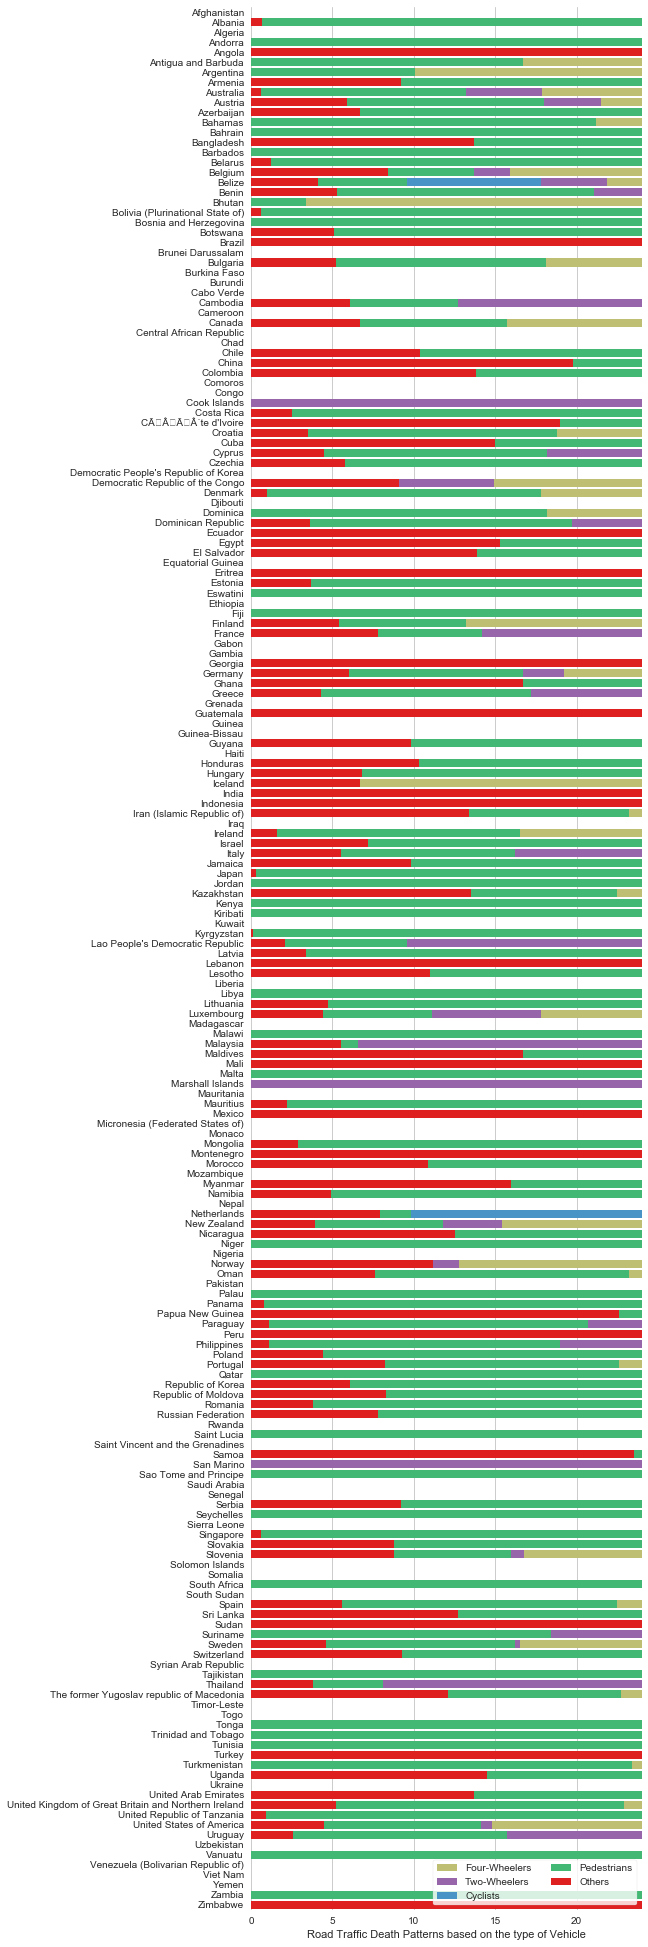

In [42]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 35))

# Load dataset
data = pd.read_csv(r"C:\Users\Salman\Desktop\SEM1\CA682-Data Management & Visualisation\salman\CA682-Assignment\Datasets\converted\mergedRoadTrafficDeathV1.csv", encoding="ISO-8859-1")
data.dropna()
# Plot for the type Four-Wheeler
sns.barplot(x="Four-Wheelers", y="Country", data=data, label="Four-Wheelers", color="#cccc66")

# Plot the data for Wine
sns.barplot(x="Two-Wheelers", y="Country", data=data, label="Two-Wheelers", color="#9b59b6")

#Plot the data for Spirits 
sns.barplot(x="Cyclists", y="Country", data=data, label="Cyclists",color="#3498db")

# Plot the data for Other drinks
sns.barplot(x="Pedestrians", y="Country", data=data, label="Pedestrians", color="#2ecc71")

# Plot the data for Other drinks
sns.barplot(x="Others", y="Country", data=data, label="Others", color="red")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Road Traffic Death Patterns based on the type of Vehicle")
sns.despine(left=True, bottom=True)

Now this is the end of 1st Phase of cleaning and a bit of Visualization.